<a href="https://colab.research.google.com/github/Raajarapu/SAP_COLLEGE_EDUNET_FOUDATION/blob/main/Model1RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv('gas_supply_synthetic.csv')

In [ ]:
df

,record_id,date,region,city,station_id,temp_c,humidity_pct,population_density_per_km2,distance_to_refinery_km,truck_capacity_m3,num_trucks,day_of_week,holiday_flag,gas_price_per_unit,maintenance_flag,pipeline_disruption_flag,demand_volume_m3,supply_capacity_m3,delivery_time_hrs,stockout
0,1,2023-04-13,East,CityH,S1124,11.45,43.70,168.66,11.91,1500,4,3,0,69.00,1,0,706,5487,4.00,0
1,2,2023-12-15,East,CityI,S1256,25.75,44.28,352.74,195.68,1500,2,4,0,65.82,0,0,893,2447,10.12,0
2,3,2023-09-28,West,CityK,S1091,20.06,41.38,256.57,142.20,1500,3,3,0,62.42,0,0,957,3632,7.37,0
3,4,2023-04-17,East,CityI,S1224,23.97,42.08,674.56,128.91,2000,8,0,1,53.15,0,0,1224,13953,6.71,1
4,5,2023-03-13,North,CityA,S1194,17.03,53.11,117.94,93.00,1000,6,0,0,56.36,0,0,622,4877,5.59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,2023-10-23,South,CityD,S1090,15.17,45.39,260.91,152.42,2000,5,0,0,46.44,0,0,886,9871,7.53,0
14996,14997,2023-05-14,Central,CityM,S1035,22.89,75.75,69.37,152.10,1500,8,6,0,65.07,0,0,657,10889,6.96,0
14997,14998,2023-01-27,East,CityI,S1006,25.43,68.46,117.71,81.86,1500,9,4,0,61.52,0,0,823,13279,9.41,0
14998,14999,2023-02-07,South,CityE,S1320,20.48,88.34,318.11,29.14,1500,13,1,0,71.71,0,0,859,15802,4.69,1


In [ ]:
df.head(100)

,record_id,date,region,city,station_id,temp_c,humidity_pct,population_density_per_km2,distance_to_refinery_km,truck_capacity_m3,num_trucks,day_of_week,holiday_flag,gas_price_per_unit,maintenance_flag,pipeline_disruption_flag,demand_volume_m3,supply_capacity_m3,delivery_time_hrs,stockout
0,1,2023-04-13,East,CityH,S1124,11.45,43.70,168.66,11.91,1500,4,3,0,69.00,1,0,706,5487,4.00,0
1,2,2023-12-15,East,CityI,S1256,25.75,44.28,352.74,195.68,1500,2,4,0,65.82,0,0,893,2447,10.12,0
2,3,2023-09-28,West,CityK,S1091,20.06,41.38,256.57,142.20,1500,3,3,0,62.42,0,0,957,3632,7.37,0
3,4,2023-04-17,East,CityI,S1224,23.97,42.08,674.56,128.91,2000,8,0,1,53.15,0,0,1224,13953,6.71,1
4,5,2023-03-13,North,CityA,S1194,17.03,53.11,117.94,93.00,1000,6,0,0,56.36,0,0,622,4877,5.59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2023-12-11,North,CityB,S1222,37.08,73.55,3.13,5.46,2500,10,0,0,62.11,0,0,741,21434,3.57,0
96,97,2023-11-23,North,CityB,S1309,21.52,33.18,635.04,137.83,2000,3,3,1,60.69,0,0,1256,4986,7.79,1
97,98,2023-01-09,South,CityD,S1282,26.68,66.40,218.16,76.61,2000,4,0,0,72.27,0,0,909,5667,4.58,1
98,99,2023-12-10,South,CityD,S1348,20.65,26.23,140.91,29.93,1500,9,6,0,52.63,0,0,803,13062,5.82,0


In [ ]:
df.duplicated

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Length: 15000, dtype: bool

In [ ]:
df.isnull().sum()

record_id                     0
date                          0
region                        0
city                          0
station_id                    0
temp_c                        0
humidity_pct                  0
population_density_per_km2    0
distance_to_refinery_km       0
truck_capacity_m3             0
num_trucks                    0
day_of_week                   0
holiday_flag                  0
gas_price_per_unit            0
maintenance_flag              0
pipeline_disruption_flag      0
demand_volume_m3              0
supply_capacity_m3            0
delivery_time_hrs             0
stockout                      0
dtype: int64

In [ ]:
df.sample()

,record_id,date,region,city,station_id,temp_c,humidity_pct,population_density_per_km2,distance_to_refinery_km,truck_capacity_m3,num_trucks,day_of_week,holiday_flag,gas_price_per_unit,maintenance_flag,pipeline_disruption_flag,demand_volume_m3,supply_capacity_m3,delivery_time_hrs,stockout
3811,3812,2023-07-07,South,CityF,S1106,26.82,52.87,308.64,84.71,1000,6,4,0,60.6,0,0,731,4676,5.33,0


In [ ]:
df.sample(1000)

,record_id,date,region,city,station_id,temp_c,humidity_pct,population_density_per_km2,distance_to_refinery_km,truck_capacity_m3,num_trucks,day_of_week,holiday_flag,gas_price_per_unit,maintenance_flag,pipeline_disruption_flag,demand_volume_m3,supply_capacity_m3,delivery_time_hrs,stockout
2275,2276,2023-03-11,West,CityL,S1232,24.64,48.47,33.61,22.86,2500,7,5,0,64.11,0,0,756,15528,5.37,0
5362,5363,2023-04-18,South,CityF,S1013,38.30,33.67,51.92,93.58,2000,6,1,0,71.82,0,0,736,11266,6.24,0
13829,13830,2023-08-18,West,CityJ,S1247,22.71,59.23,399.12,83.48,2000,3,4,0,61.69,0,0,974,5396,6.87,0
11375,11376,2023-12-28,North,CityB,S1490,18.05,64.21,312.86,233.23,1000,4,3,0,69.16,0,0,845,3547,11.54,1
11553,11554,2023-10-08,East,CityH,S1013,30.07,71.56,222.93,53.58,2000,6,6,0,61.60,0,0,887,11767,6.11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,2783,2023-05-04,West,CityL,S1002,22.23,66.70,100.16,29.90,2000,5,3,0,51.31,0,0,758,7629,7.10,0
8290,8291,2023-10-02,North,CityB,S1254,24.83,83.23,109.26,2.73,2000,5,0,0,63.42,0,0,757,9439,6.35,0
14768,14769,2023-09-20,South,CityE,S1313,35.04,67.39,336.04,34.41,1500,6,2,0,55.02,0,0,877,7493,4.05,0
1468,1469,2023-03-23,North,CityB,S1195,25.18,83.54,159.04,70.01,1500,9,3,0,58.65,0,0,699,11799,4.26,0


In [ ]:
y = df['stockout']
X = df[[
    'temp_c','humidity_pct','population_density_per_km2','distance_to_refinery_km',
    'truck_capacity_m3','num_trucks','day_of_week','holiday_flag','gas_price_per_unit',
    'maintenance_flag','pipeline_disruption_flag','demand_volume_m3','supply_capacity_m3','delivery_time_hrs'
]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 20% test data
    random_state=42,
    stratify=y               # keep same class ratio
)

In [ ]:
model=RandomForestClassifier(n_estimators=150,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

In [ ]:
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

In [ ]:
importances = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

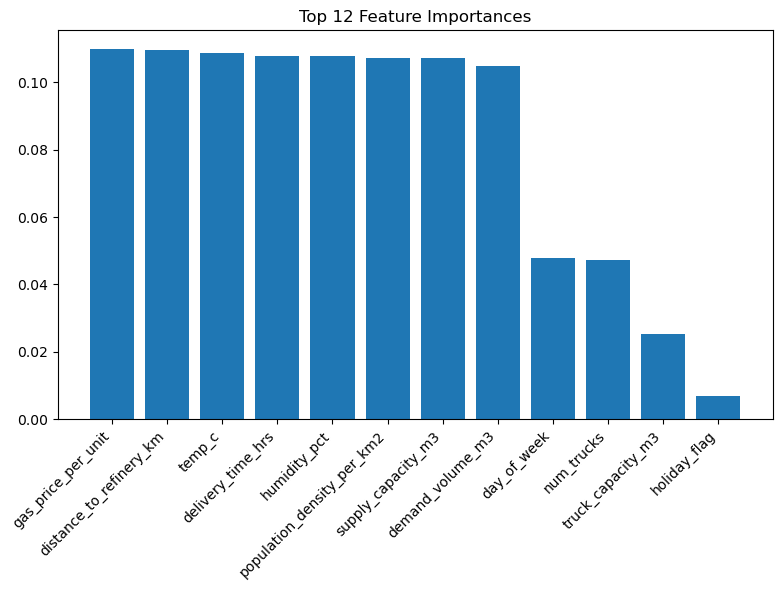

In [ ]:
plt.figure(figsize=(8,6))
topn = importances.head(12)
plt.bar(range(len(topn)), topn.values)
plt.xticks(range(len(topn)), topn.index, rotation=45, ha='right')
plt.title("Top 12 Feature Importances")
plt.tight_layout()
plt.show()

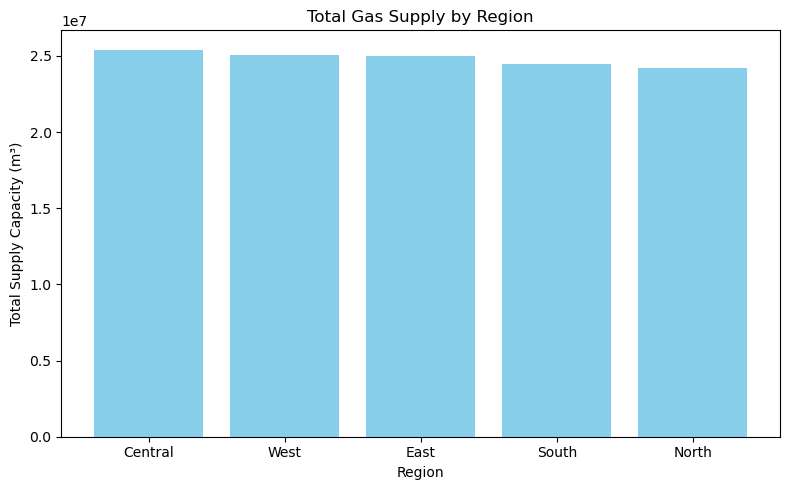

In [ ]:
region_supply = df.groupby('region')['supply_capacity_m3'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.bar(region_supply.index, region_supply.values, color='skyblue')
plt.title("Total Gas Supply by Region")
plt.xlabel("Region")
plt.ylabel("Total Supply Capacity (m³)")
plt.tight_layout()
plt.show()

In [ ]:
region_demand = df.groupby('region')['demand_volume_m3'].sum().sort_values(ascending=False)
bar_width = 0.35
regions_sorted = region_supply.index
x = np.arange(len(regions_sorted))

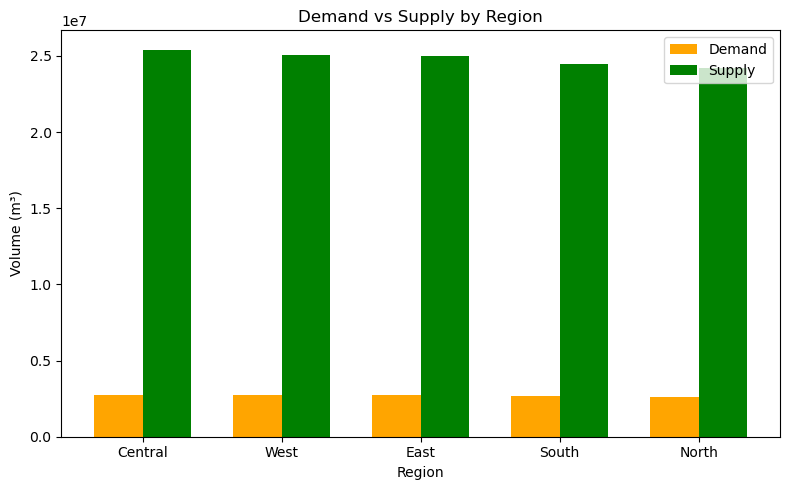

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(x - bar_width/2, region_demand[regions_sorted].values, bar_width, label='Demand', color='orange')
plt.bar(x + bar_width/2, region_supply[regions_sorted].values, bar_width, label='Supply', color='green')
plt.xticks(x, regions_sorted)
plt.title("Demand vs Supply by Region")
plt.xlabel("Region")
plt.ylabel("Volume (m³)")
plt.legend()
plt.tight_layout()
plt.show()

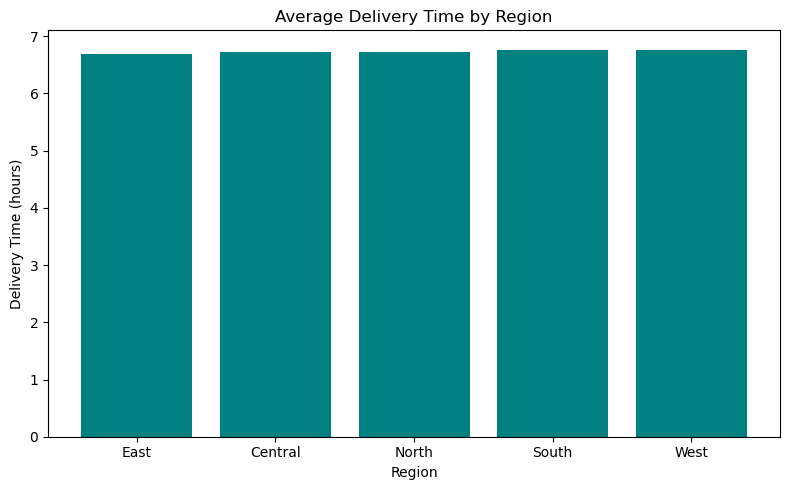

In [ ]:
region_delivery = df.groupby('region')['delivery_time_hrs'].mean().sort_values()
plt.figure(figsize=(8,5))
plt.bar(region_delivery.index, region_delivery.values, color='teal')
plt.title("Average Delivery Time by Region")
plt.xlabel("Region")
plt.ylabel("Delivery Time (hours)")
plt.tight_layout()
plt.show()

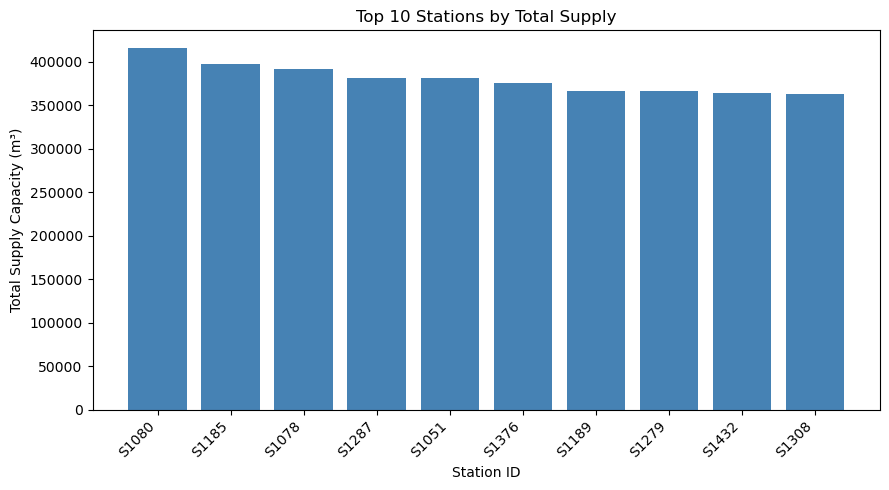

In [ ]:
station_supply = df.groupby('station_id')['supply_capacity_m3'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(9,5))
plt.bar(station_supply.index, station_supply.values, color='steelblue')
plt.title("Top 10 Stations by Total Supply")
plt.xlabel("Station ID")
plt.ylabel("Total Supply Capacity (m³)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
numeric_cols = ['temp_c','humidity_pct','population_density_per_km2','distance_to_refinery_km',
                'truck_capacity_m3','num_trucks','gas_price_per_unit','demand_volume_m3',
                'supply_capacity_m3','delivery_time_hrs']
corr = df[numeric_cols].corr()

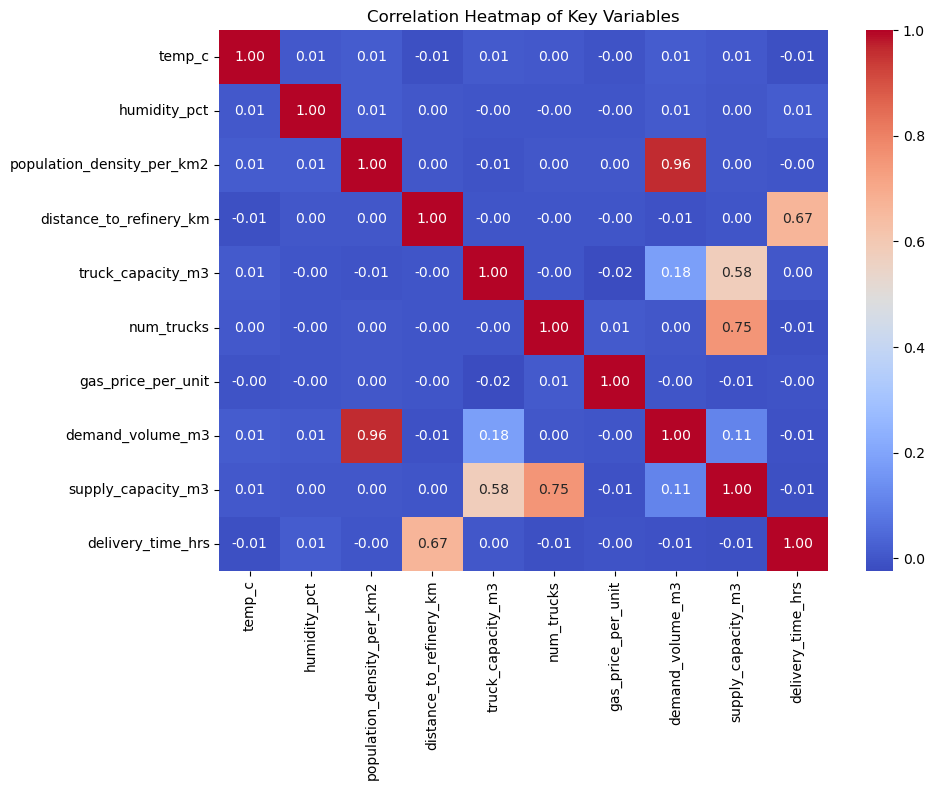

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Key Variables")
plt.tight_layout()
plt.show()

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.692


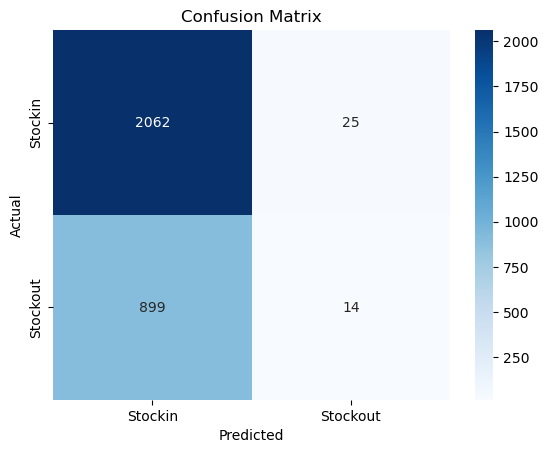

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stockin', 'Stockout'], yticklabels=['Stockin', 'Stockout'] )

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix')

plt.show()

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred,target_names=['Stockin', 'Stockout']))


Classification Report:
               precision    recall  f1-score   support

     Stockin       0.70      0.99      0.82      2087
    Stockout       0.36      0.02      0.03       913

    accuracy                           0.69      3000
   macro avg       0.53      0.50      0.42      3000
weighted avg       0.59      0.69      0.58      3000



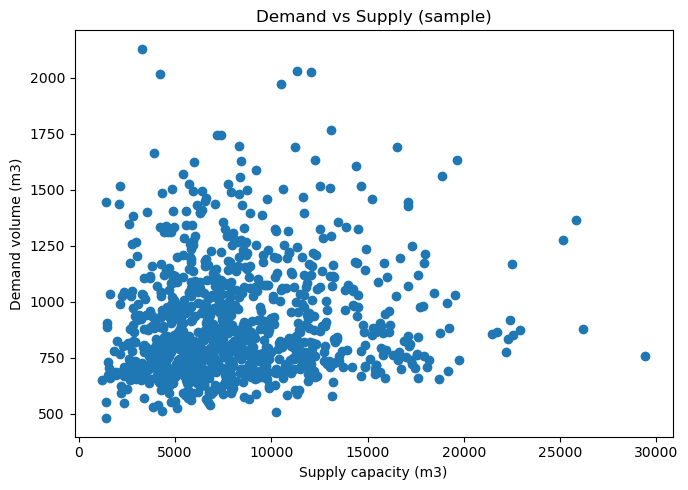

In [ ]:
sample_df = df.sample(1000, random_state=42)
plt.figure(figsize=(7,5))
plt.scatter(sample_df['supply_capacity_m3'], sample_df['demand_volume_m3'])
plt.xlabel("Supply capacity (m3)")
plt.ylabel("Demand volume (m3)")
plt.title("Demand vs Supply (sample)")
plt.tight_layout()
plt.show()

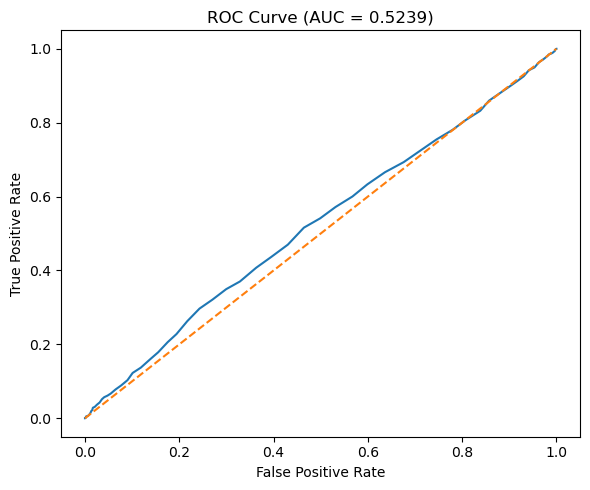

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.title("ROC Curve (AUC = {:.4f})".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.tight_layout()
plt.show()